# WeatherPy
----

#### Analysis
* 1.) In the Northern Hemisphere, there appears to be unexplained variation in the data observing any relation between City Latiude and Humidity percentage, with an R-sqared value as low as the one outputed for the regression model below, there does not appear to be a strong correlation between the two variables, as unexplained variation is a possibility.  
* 2.) There does appear to be a correlation between City Latitude and Maximum Temperature as can be seen in both Southern and Northern Hemisphere regression models which have positive and negative line equations respectively. This could indicate that higher temperatures are more likely to appear the closer a city is to the Equator.
* 3). There may be a correlation in low cloudiness percentages in cities that are 20 to 30 degrees North or South of the Equator as there appears to be a cluster of data points within both the Northern and Southern Hemisphere cloudiness charts that lie along the x-axis which indicate low cloudiness. 

In [88]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# analysis date
analysis_date = '(8/3/2020)' 

## Generate Cities List

In [89]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities[0:1]   

['nanortalik']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [90]:
# create url 
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city = 'Cayenne,'

#make a list of callable lists
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

for city in cities:
    response = requests.get(query_url + city).json()
#     print(json.dumps(response, indent=3)) 
    try:
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"Processing City:{response['name']} & City Number:{response['id']}")  
    except:
        print(f'skipping: {city} not found') 
        




Processing City:Nanortalik & City Number:3421765
Processing City:Wahiawā & City Number:5853992
Processing City:Shelburne & City Number:6145890
Processing City:Coquimbo & City Number:3893629
Processing City:Teeli & City Number:1489828
Processing City:Tasiilaq & City Number:3424607
Processing City:Polunochnoye & City Number:1494482
Processing City:Port Elizabeth & City Number:964420
Processing City:Bafra & City Number:751335
Processing City:Avarua & City Number:4035715
Processing City:Saint Anthony & City Number:5044290
skipping: illoqqortoormiut not found
Processing City:Praia da Vitória & City Number:3372760
Processing City:Vaini & City Number:4032243
Processing City:Cayenne & City Number:3382160
Processing City:Rikitea & City Number:4030556
Processing City:Severo-Kuril'sk & City Number:2121385
Processing City:Tautira & City Number:4033557
Processing City:Norman Wells & City Number:6089245
Processing City:Kavaratti & City Number:1267390
skipping: vaitupu not found
Processing City:Kerma

Processing City:Warrington & City Number:2634739
Processing City:Bilma & City Number:2446796
Processing City:Kathmandu & City Number:1283240
Processing City:Coro & City Number:3645213
Processing City:Nabire & City Number:1634614
Processing City:Camacha & City Number:2270385
Processing City:Al Bardīyah & City Number:80509
Processing City:Las Vegas & City Number:5506956
Processing City:Srednekolymsk & City Number:2121025
Processing City:Nouadhibou & City Number:2377457
Processing City:Kodinsk & City Number:1503037
Processing City:Port Macquarie & City Number:2152659
Processing City:Alghero & City Number:3183284
Processing City:São Filipe & City Number:3374210
Processing City:Iskateley & City Number:866062
skipping: grand river south east not found
Processing City:Wanning & City Number:1791779
Processing City:Reconquista & City Number:3429594
Processing City:Khovd & City Number:1516048
Processing City:Brewster & City Number:5110092
Processing City:Departamento de Maldonado & City Number:3

Processing City:Maricá & City Number:3457708
Processing City:Qian’an & City Number:2035410
Processing City:Caravelas & City Number:3466980
skipping: mys shmidta not found
Processing City:Kedrovyy & City Number:1538641
Processing City:Hambantota & City Number:1244926
skipping: marcona not found
skipping: barentsburg not found
Processing City:Changji & City Number:1529569
Processing City:Lárdos & City Number:408689
Processing City:Sur & City Number:286245
Processing City:Sassandra & City Number:2281951
Processing City:Grindavik & City Number:3416888
Processing City:Vao & City Number:2137773
skipping: qabis not found
Processing City:Natal & City Number:3394023
Processing City:Bud & City Number:4255151
Processing City:Kokopo & City Number:2093685
Processing City:Wundanyi & City Number:178073
Processing City:Barra do Garças & City Number:3470709
Processing City:Tiarei & City Number:4033356
Processing City:Taksimo & City Number:2015701
Processing City:Richards Bay & City Number:962367
Proces

Processing City:Taoudenni & City Number:2450173
Processing City:Liubar & City Number:702486
skipping: nizhneshilovka not found
Processing City:Makaha & City Number:5850511
Processing City:La Palma & City Number:5364022
Processing City:Hokitika & City Number:2206894
Processing City:Châteauroux & City Number:3026204
Processing City:Kieta & City Number:2094027
Processing City:Biak & City Number:1637001
Processing City:Avera & City Number:4231997
Processing City:Hirara & City Number:1862505
skipping: viligili not found
Processing City:Thunder Bay & City Number:6166142
Processing City:Iguape & City Number:3461465
Processing City:Portland & City Number:5746545
Processing City:Montgomery & City Number:4362716
skipping: rungata not found
Processing City:Kroya & City Number:1639337
Processing City:Panjāb & City Number:1131162
skipping: satitoa not found
Processing City:Cho Dok & City Number:1585660
Processing City:Zaranj & City Number:1120985
Processing City:Novobelokatay & City Number:519027
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [91]:
#put lists into dictionary 
city_dict = {
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp (F)": max_temp,
    "Humidity (%)": humidity,
    "Cloudiness (%)": cloudiness,
    "Wind Speed (mph)": wind_speed,
    "Country": country,
    "Date": date,
}

cities_df = pd.DataFrame(city_dict) 
cities_df

,City,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,Nanortalik,60.14,-45.24,45.41,89,100,6.78,GL,1596493691
1,Wahiawā,21.50,-158.02,87.80,57,75,10.29,US,1596493692
2,Shelburne,44.08,-80.20,68.00,94,40,4.70,CA,1596493692
3,Coquimbo,-29.95,-71.34,53.60,93,40,11.41,CL,1596493692
4,Teeli,51.03,90.23,50.52,73,3,1.21,RU,1596493692
...,...,...,...,...,...,...,...,...,...
583,Khani,41.96,42.96,62.60,93,3,4.70,GE,1596493846
584,Koudougou,12.25,-2.37,72.07,92,100,10.02,BF,1596493847
585,Egvekinot,66.32,-179.17,50.09,61,23,5.66,RU,1596493847
586,Newport,51.59,-3.00,61.00,72,79,5.10,GB,1596493842


In [92]:
#dataframe to csv export
cities_df.to_csv(path_or_buf=output_data_file, index=False) 

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [93]:
cities_df.describe() 

,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
count,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,5.880000e+02
mean,19.686752,18.487857,68.873997,72.751701,50.591837,7.832908,1.596494e+09
std,33.546071,91.380678,13.852233,19.957184,37.669233,5.078147,7.344482e+01
min,-54.800000,-179.170000,33.010000,5.000000,0.000000,0.510000,1.596493e+09
25%,-8.152500,-60.000000,57.580000,60.000000,11.000000,4.225000,1.596494e+09
50%,22.240000,19.130000,71.045000,78.000000,50.000000,6.930000,1.596494e+09
75%,48.412500,102.327500,79.882500,88.000000,90.000000,10.290000,1.596494e+09
max,78.220000,179.320000,111.000000,100.000000,100.000000,28.860000,1.596494e+09


In [94]:
#  Get the indices of cities that have humidity over 100%.


In [95]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [96]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [97]:
# y = "Max Temp"
# to save the images, put file_name into the function and use output_data as the path
# plt.savefig


def city_scatter(y, file_name, analysis_date): 
    plt.scatter(cities_df['Lat'], cities_df[y]) 
    plt.xlabel("City Latitude") 
    plt.ylabel(y)
    plt.title(f"City Latitude vs. {y} {analysis_date}")  
    plt.grid()
    plt.savefig(file_name) 
    plt.show() 

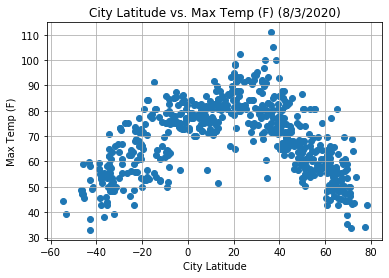

In [98]:
#plt plot latitude vs max temp
city_scatter("Max Temp (F)", 'output_data/CityLatsMaxTemp.png', analysis_date)  



## Latitude vs. Humidity Plot

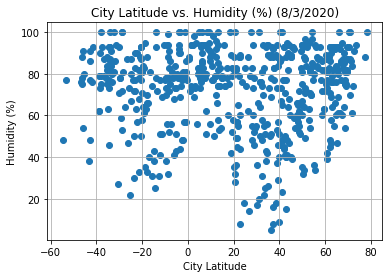

In [99]:
city_scatter("Humidity (%)", 'output_data/CityLatsvsHumidity.png', analysis_date)  

## Latitude vs. Cloudiness Plot

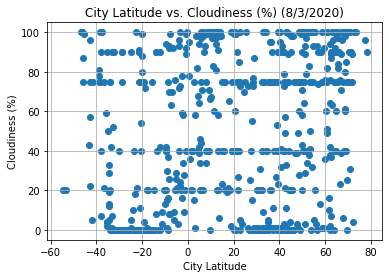

In [100]:
city_scatter("Cloudiness (%)", 'output_data/CityLatsVsCloudiness.png', analysis_date)   

Latitude vs. Wind Speed Plot

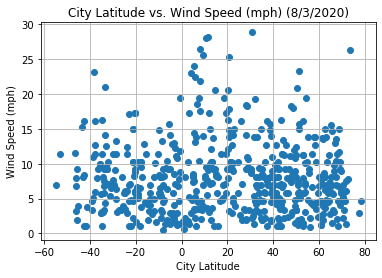

In [101]:
city_scatter("Wind Speed (mph)", 'output_data/CityLatsvsWindSpeed.png', analysis_date)   

## Linear Regression

In [106]:
# OPTIONAL: Create a function to create Linear Regression plots
# once again put file name into function to save the images
def latitude_lin_regress(df, title_name, y, equationplot, regress_file_name):
    x_values = df['Lat']
    y_values = df[y] 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, equationplot ,fontsize=15,color="red")
    plt.title(title_name)
    plt.xlabel('Latitude')
    plt.ylabel(y)
    plt.savefig(regress_file_name)
    print(f"The r-squared is: {rvalue**2}") 
    plt.show()
 

In [107]:
# Create Northern and Southern Hemisphere DataFrames
#use a .loc function in relation to Latitudes 
#the Northern Hemisphere is all latitudes greater than 0 (Equator), southern is all below 0

northern_hem_df = cities_df.loc[cities_df['Lat'] > 0]  
# northern_hem_df
southern_hem_df = cities_df.loc[cities_df['Lat'] < 0]  
southern_hem_df

,City,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
3,Coquimbo,-29.95,-71.34,53.60,93,40,11.41,CL,1596493692
7,Port Elizabeth,-33.92,25.57,55.40,93,20,5.82,ZA,1596493693
9,Avarua,-21.21,-159.78,71.60,68,91,10.29,CK,1596493694
12,Vaini,-21.20,-175.20,77.00,78,75,10.29,TO,1596493695
14,Rikitea,-23.12,-134.97,73.49,83,18,17.20,PF,1596493695
...,...,...,...,...,...,...,...,...,...
574,Santa Maria,-29.68,-53.81,73.40,78,0,6.93,BR,1596493742
575,Njombe,-9.33,34.77,49.93,94,15,6.46,TZ,1596493844
576,Flinders,-34.58,150.86,62.01,81,13,3.00,AU,1596493844
577,Solwezi,-12.17,26.39,52.34,51,0,3.18,ZM,1596493844


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4894966796231547


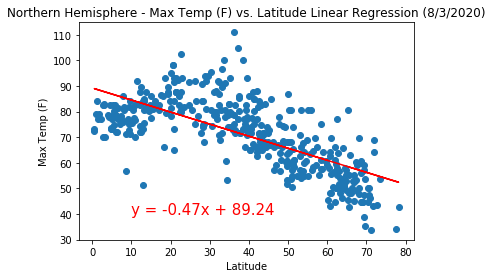

In [108]:
latitude_lin_regress(northern_hem_df, f"Northern Hemisphere - Max Temp (F) vs. Latitude Linear Regression {analysis_date}", 'Max Temp (F)', (10,40), 'output_data/NorthMaxTvsLatRegression.png')   

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5179785823115985


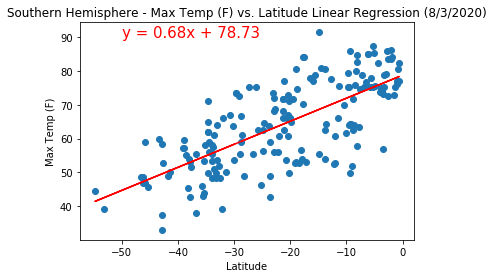

In [109]:
latitude_lin_regress(southern_hem_df, f"Southern Hemisphere - Max Temp (F) vs. Latitude Linear Regression {analysis_date}", 'Max Temp (F)', (-50,90), 'output_data/SouthMaxTvsLatRegression.png')  

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0001206934801442624


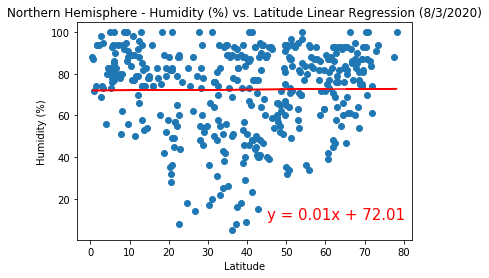

In [110]:
latitude_lin_regress(northern_hem_df, f"Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression {analysis_date}", 'Humidity (%)', (45,10), 'output_data/NorthHumidityvsLatRegression.png')    

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.011165475462071943


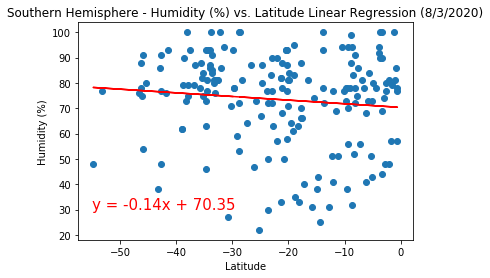

In [111]:
latitude_lin_regress(southern_hem_df, f"Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression {analysis_date}", 'Humidity (%)', (-55, 30), 'output_data/SouthHumidityvsLatRegression.png') 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0075658447415112365


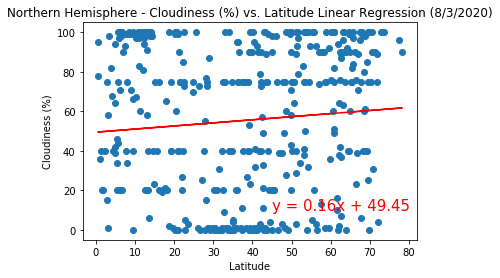

In [112]:
latitude_lin_regress(northern_hem_df, f"Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression {analysis_date}", 'Cloudiness (%)', (45,10), 'output_data/NorthCloudinessvsLatRegression.png') 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0015084544399639264


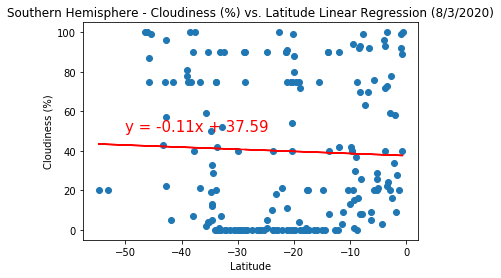

In [113]:
latitude_lin_regress(southern_hem_df, f"Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression {analysis_date}", 'Cloudiness (%)', (-50, 50), 'output_data/SouthCloudinessvsLatRegression.png') 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0208277265875574


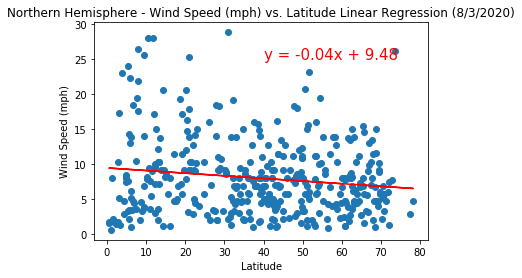

In [114]:
latitude_lin_regress(northern_hem_df, f"Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression {analysis_date}", 'Wind Speed (mph)', (40, 25), 'output_data/NorthWindSpeedvsLatRegression.png') 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01100646440052856


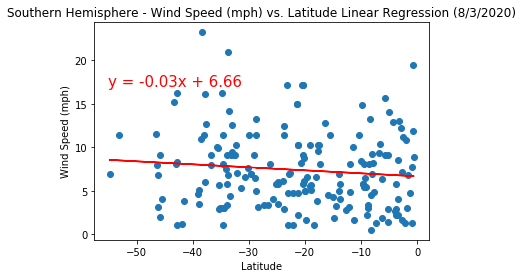

In [115]:
latitude_lin_regress(southern_hem_df, f"Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression {analysis_date}", 'Wind Speed (mph)', (-55, 17), 'output_data/SouthWindSpeedvsLatRegression.png')  